In [14]:
# PS8

In [96]:
# Read given data
def read_data(name):
    X = np.genfromtxt(name + '_features.txt', delimiter=',')
    Y = np.genfromtxt(name + '_labels.txt')
    return X, Y

name = "RRLyrae"
X, Y = read_data(name)
# Problem 1
# Using a decision tree classifier to predict Y given X
clf = DecisionTreeClassifier()
clf.fit(X, Y)
# 5-fold validation to compute acuuracy of prediction
scores = cross_val_score(clf, X, Y, cv=5) 
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Creating a truth matrix
y_pred = cross_val_predict(clf, X, Y, cv=5)
conf_matrix = confusion_matrix(Y, y_pred)
print(conf_matrix)

# Adjusting class weight 
clf2 = DecisionTreeClassifier(class_weight = 'balanced')
clf.fit(X, Y)
# 5 fold validation score
scores2 = cross_val_score(clf2, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
y_pred2 = cross_val_predict(clf2, X, Y, cv=5)
conf_matrix2 = confusion_matrix(Y, y_pred2)
print(conf_matrix2)

# Results
print('FN' ,((264-204)/264)*100, '% less')
print('TN' ,((247-237)/237)*100, '% less')
print('TP' ,((92454-92394)/92394)*100, '% more')
print('FP' ,((246-236)/236)*100, '% more')
print('RR Lyrae detection rate' , (237/(204+237)))
"""
Adjusting the class weight to being balanced reduced the number of false negatives by 22.7% and
reduced the number of true negatives by 4.2%. The number of true positives also increased by.065% and 
the number of false positives also increased by 4.2%.
Overall this is more accurate, because the number of false negatives was reduced by 22.7%, resulting in a 
53% detection rate of RR Lyrae stars.

"""

Accuracy: 0.99 (+/- 0.00)
[[92395   263]
 [  228   255]]
Accuracy: 0.99 (+/- 0.00)
[[92448   210]
 [  247   236]]
FN 22.727272727272727 % less
TN 4.219409282700422 % less
TP 0.06493928177154361 % more
FP 4.23728813559322 % more
RR Lyrae detection rate 0.5374149659863946


'\nAdjusting the class weight to being balanced reduced the number of false negatives by 22.7% and\nreduced the number of true negatives by 4.2%. The number of true positives also increased by.065% and \nthe number of false positives also increased by 4.2%.\nOverall this is more accurate, because the number of false negatives was reduced by 22.7%, resulting in a \n53% detection rate of RR Lyrae stars.\n\n'

In [36]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [37]:
# Read given data
def read_data(name):
    X = np.genfromtxt(name + '_features.txt', delimiter=',')
    Y = np.genfromtxt(name + '_labels.txt')
    return X, Y

name = "RRLyrae"
X, Y = read_data(name)

In [38]:
# Problem 1

def decision_tree_RRLyrae(X, Y, clf):
    clf.fit(X, Y)
    # 5-fold validation to compute acuuracy of prediction
    scores = cross_val_score(clf, X, Y, cv=5) 
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    
"""
Truth Matrix format:
[TP, FN]
[FP, TN]
"""   
def truth_matrix_RRLyrae(clf):
    y_pred = cross_val_predict(clf, X, Y, cv=5)
    conf_matrix = confusion_matrix(Y, y_pred)
    print(conf_matrix)
    return conf_matrix
    
def decision_tree_results(matrix1, matrix2):
    TP1 = matrix1[0][0]
    FN1 = matrix1[0][1]
    FP1 = matrix1[1][0]
    TN1 = matrix1[1][1]

    TP2 = matrix2[0][0]
    FN2 = matrix2[0][1]
    FP2 = matrix2[1][0]
    TN2 = matrix2[1][1]

    
    print('FN' ,((FN2-FN1)/FN1)*100, '% change')
    print('TN' ,((TN2-TN1)/TN1)*100, '% change')
    print('TP' ,((TP2-TP1)/TP1)*100, '% change')
    print('FP' ,((FP2-FP1)/FP1)*100, '% change')
    print('RR Lyrae detection rate 1' ,((TN1/(FP1+TN1))))
    print('RR Lyrae detection rate 2' ,((TN2/(FP2+TN2))))
    print('RR Lyrae detection rate change' , (((TN2/(FP2+TN2)))-((TN1/(FP1+TN1))))*100, '% change')

In [100]:
'''def call_decision_tree_truth_matrix_results(clf, matrix_name, matrix1):
    decision_tree_RRLyrae(X, Y, DecisionTreeClassifier(class_weight = 'balanced'))
    matrix_name = truth_matrix_RRLyrae(DecisionTreeClassifier(class_weight = 'balanced'))
    decision_tree_results(matrix1, matrix_name)
    
call_decision_tree_truth_matrix_results(DecisionTreeClassifier(class_weight = 'balanced'), truth_matrix_22, truth_matrix_1)'''

"def call_decision_tree_truth_matrix_results(clf, matrix_name, matrix1):\n    decision_tree_RRLyrae(X, Y, DecisionTreeClassifier(class_weight = 'balanced'))\n    matrix_name = truth_matrix_RRLyrae(DecisionTreeClassifier(class_weight = 'balanced'))\n    decision_tree_results(matrix1, matrix_name)\n    \ncall_decision_tree_truth_matrix_results(DecisionTreeClassifier(class_weight = 'balanced'), truth_matrix_22, truth_matrix_1)"

In [101]:
# Accuracy and truth matrix for decision tree
decision_tree_RRLyrae(X, Y, DecisionTreeClassifier())
truth_matrix_1 = truth_matrix_RRLyrae(DecisionTreeClassifier())

Accuracy: 0.99 (+/- 0.00)
[[92409   249]
 [  237   246]]


In [102]:
# Accuracy and truth matrix for decision tree with weight class set to balanced
decision_tree_RRLyrae(X, Y, DecisionTreeClassifier(class_weight = 'balanced'))
truth_matrix_2 = truth_matrix_RRLyrae(DecisionTreeClassifier(class_weight = 'balanced'))
decision_tree_results(truth_matrix_1, truth_matrix_2)

Accuracy: 1.00 (+/- 0.00)
[[92449   209]
 [  244   239]]
FN -16.06425702811245 % change
TN -2.8455284552845526 % change
TP 0.04328582713804933 % change
FP 2.9535864978902953 % change
RR Lyrae detection rate 1 0.5093167701863354
RR Lyrae detection rate 2 0.494824016563147
RR Lyrae detection rate change -1.449275362318836 % change


In [36]:
"""
Setting the class weight to balanced is more accurate. It decreased the number of False negatives by 18%. 
Overall, the RR Lyrae detection rate has increased by 3.46%
"""

0.48336594911937375


'\nTruth Matrix format:\n[TP, FN]\n[FP, TN]\n\nOnly 1% of the data are RR lyrae stars. The negative, which coorelates to being RR Lyrae has only a 49.3% accuracy\nas 255 were false negatives, while only 251 were true negatives.\n\n'

In [ ]:
"""
In this case, we want detect as many RR Lyrae stars as possible, even if it means a higher false negative rate. 
The depth that gives the highest number of RR Lyrae detections is best.
"""

In [103]:
# Accuracy and truth matrix for decision tree with max depth set to 3
decision_tree_RRLyrae(X, Y, DecisionTreeClassifier(max_depth=3))
truth_matrix_3 = truth_matrix_RRLyrae(DecisionTreeClassifier(max_depth=3))
decision_tree_results(truth_matrix_1, truth_matrix_3)

Accuracy: 0.99 (+/- 0.00)
[[92473   185]
 [  389    94]]
FN -25.702811244979916 % change
TN -61.78861788617886 % change
TP 0.06925732342087892 % change
FP 64.13502109704642 % change
RR Lyrae detection rate 1 0.5093167701863354
RR Lyrae detection rate 2 0.19461697722567287
RR Lyrae detection rate change -31.469979296066253 % change


In [114]:
# Accuracy and truth matrix for decision tree with max depth set to 4
decision_tree_RRLyrae(X, Y, DecisionTreeClassifier(max_depth=4))
truth_matrix_4 = truth_matrix_RRLyrae(DecisionTreeClassifier(max_depth=4))
decision_tree_results(truth_matrix_1, truth_matrix_4)

Accuracy: 1.00 (+/- 0.00)
[[92386   272]
 [  183   300]]
FN 9.236947791164658 % change
TN 21.951219512195124 % change
TP -0.02488935060437836 % change
FP -22.78481012658228 % change
RR Lyrae detection rate 1 0.5093167701863354
RR Lyrae detection rate 2 0.6211180124223602
RR Lyrae detection rate change 11.180124223602483 % change


In [115]:
# Accuracy and truth matrix for decision tree with max depth set to 5
decision_tree_RRLyrae(X, Y, DecisionTreeClassifier(max_depth=5))
truth_matrix_5 = truth_matrix_RRLyrae(DecisionTreeClassifier(max_depth=5))
decision_tree_results(truth_matrix_1, truth_matrix_5)

Accuracy: 1.00 (+/- 0.00)
[[92439   219]
 [  198   285]]
FN -12.048192771084338 % change
TN 15.853658536585366 % change
TP 0.03246437035353699 % change
FP -16.455696202531644 % change
RR Lyrae detection rate 1 0.5093167701863354
RR Lyrae detection rate 2 0.5900621118012422
RR Lyrae detection rate change 8.074534161490687 % change


In [ ]:
"""
Max depth 4 was the best, as it gave the highest rate of TN, accurately detected RR Lyrae. 
The FP rate was also the lowest.
"""

In [117]:
# Accuracy and truth matrix for decision tree with max depth set to 30, and weight class set to balanced
decision_tree_RRLyrae(X, Y, DecisionTreeClassifier(max_depth=30, class_weight='balanced'))
truth_matrix_6 = truth_matrix_RRLyrae(DecisionTreeClassifier(max_depth=30, class_weight='balanced'))
decision_tree_results(truth_matrix_1, truth_matrix_6)

Accuracy: 1.00 (+/- 0.00)
[[92403   255]
 [  175   308]]
FN 2.4096385542168677 % change
TN 25.203252032520325 % change
TP -0.006492874070707399 % change
FP -26.160337552742618 % change
RR Lyrae detection rate 1 0.5093167701863354
RR Lyrae detection rate 2 0.6376811594202898
RR Lyrae detection rate change 12.836438923395443 % change


In [113]:
# Accuracy and truth matrix for decision tree with max depth set to 4, and weight class set to balanced
decision_tree_RRLyrae(X, Y, DecisionTreeClassifier(max_depth=4, class_weight='balanced'))
truth_matrix_7 = truth_matrix_RRLyrae(DecisionTreeClassifier(max_depth=4, class_weight='balanced'))
decision_tree_results(truth_matrix_1, truth_matrix_7)

Accuracy: 0.97 (+/- 0.01)
[[90209  2449]
 [   13   470]]
FN 883.5341365461848 % change
TN 91.05691056910568 % change
TP -2.380720492592713 % change
FP -94.51476793248945 % change
RR Lyrae detection rate 1 0.5093167701863354
RR Lyrae detection rate 2 0.9730848861283644
RR Lyrae detection rate change 46.376811594202906 % change


In [112]:
# Accuracy and truth matrix for decision tree with max depth set to 15, and weight class set to balanced
decision_tree_RRLyrae(X, Y, DecisionTreeClassifier(max_depth=15, class_weight='balanced'))
truth_matrix_8 = truth_matrix_RRLyrae(DecisionTreeClassifier(max_depth=15, class_weight='balanced'))
decision_tree_results(truth_matrix_1, truth_matrix_8)

Accuracy: 0.99 (+/- 0.00)
[[91819   839]
 [   67   416]]
FN 236.94779116465864 % change
TN 69.10569105691057 % change
TP -0.6384659502862275 % change
FP -71.72995780590718 % change
RR Lyrae detection rate 1 0.5093167701863354
RR Lyrae detection rate 2 0.8612836438923396
RR Lyrae detection rate change 35.19668737060042 % change


In [104]:
# Accuracy and truth matrix for decision tree with max depth set to 20, and weight class set to balanced
decision_tree_RRLyrae(X, Y, DecisionTreeClassifier(max_depth=20, class_weight='balanced'))
truth_matrix_9 = truth_matrix_RRLyrae(DecisionTreeClassifier(max_depth=20, class_weight='balanced'))
decision_tree_results(truth_matrix_1, truth_matrix_9)

Accuracy: 0.99 (+/- 0.00)
[[92076   582]
 [   92   391]]
FN 133.73493975903614 % change
TN 58.94308943089431 % change
TP -0.36035451092426063 % change
FP -61.18143459915611 % change
RR Lyrae detection rate 1 0.5093167701863354
RR Lyrae detection rate 2 0.8095238095238095
RR Lyrae detection rate change 30.020703933747416 % change


In [105]:
# Accuracy and truth matrix for decision tree with max depth set to 25, and weight class set to balanced
decision_tree_RRLyrae(X, Y, DecisionTreeClassifier(max_depth=25, class_weight='balanced'))
truth_matrix_10 = truth_matrix_RRLyrae(DecisionTreeClassifier(max_depth=25, class_weight='balanced'))
decision_tree_results(truth_matrix_1, truth_matrix_10)

Accuracy: 0.99 (+/- 0.00)
[[92303   355]
 [  130   353]]
FN 42.570281124497996 % change
TN 43.49593495934959 % change
TP -0.11470744191583071 % change
FP -45.14767932489451 % change
RR Lyrae detection rate 1 0.5093167701863354
RR Lyrae detection rate 2 0.7308488612836439
RR Lyrae detection rate change 22.153209109730852 % change


In [127]:
"""
Most accurate. Combined with the class weight set to balanced, setting the max depth to three was the most accurate.
"""
# Accuracy and truth matrix for decision tree with max depth set to 3, and weight class set to balanced
decision_tree_RRLyrae(X, Y, DecisionTreeClassifier(max_depth=3, class_weight='balanced'))
truth_matrix_11 = truth_matrix_RRLyrae(DecisionTreeClassifier(max_depth=3, class_weight='balanced'))
decision_tree_results(truth_matrix_1, truth_matrix_11)

Accuracy: 0.97 (+/- 0.01)
[[89946  2712]
 [   11   472]]
FN 989.1566265060242 % change
TN 91.869918699187 % change
TP -2.6653248060253873 % change
FP -95.35864978902954 % change
RR Lyrae detection rate 1 0.5093167701863354
RR Lyrae detection rate 2 0.9772256728778468
RR Lyrae detection rate change 46.79089026915114 % change


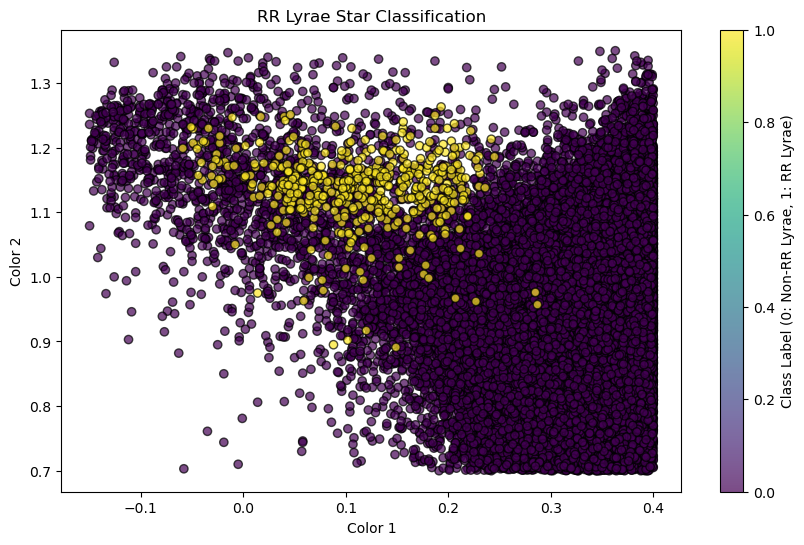

In [35]:

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('Color 1')
plt.ylabel('Color 2')
plt.title('RR Lyrae Star Classification')
plt.colorbar(label='Class Label (0: Non-RR Lyrae, 1: RR Lyrae)')
plt.show()

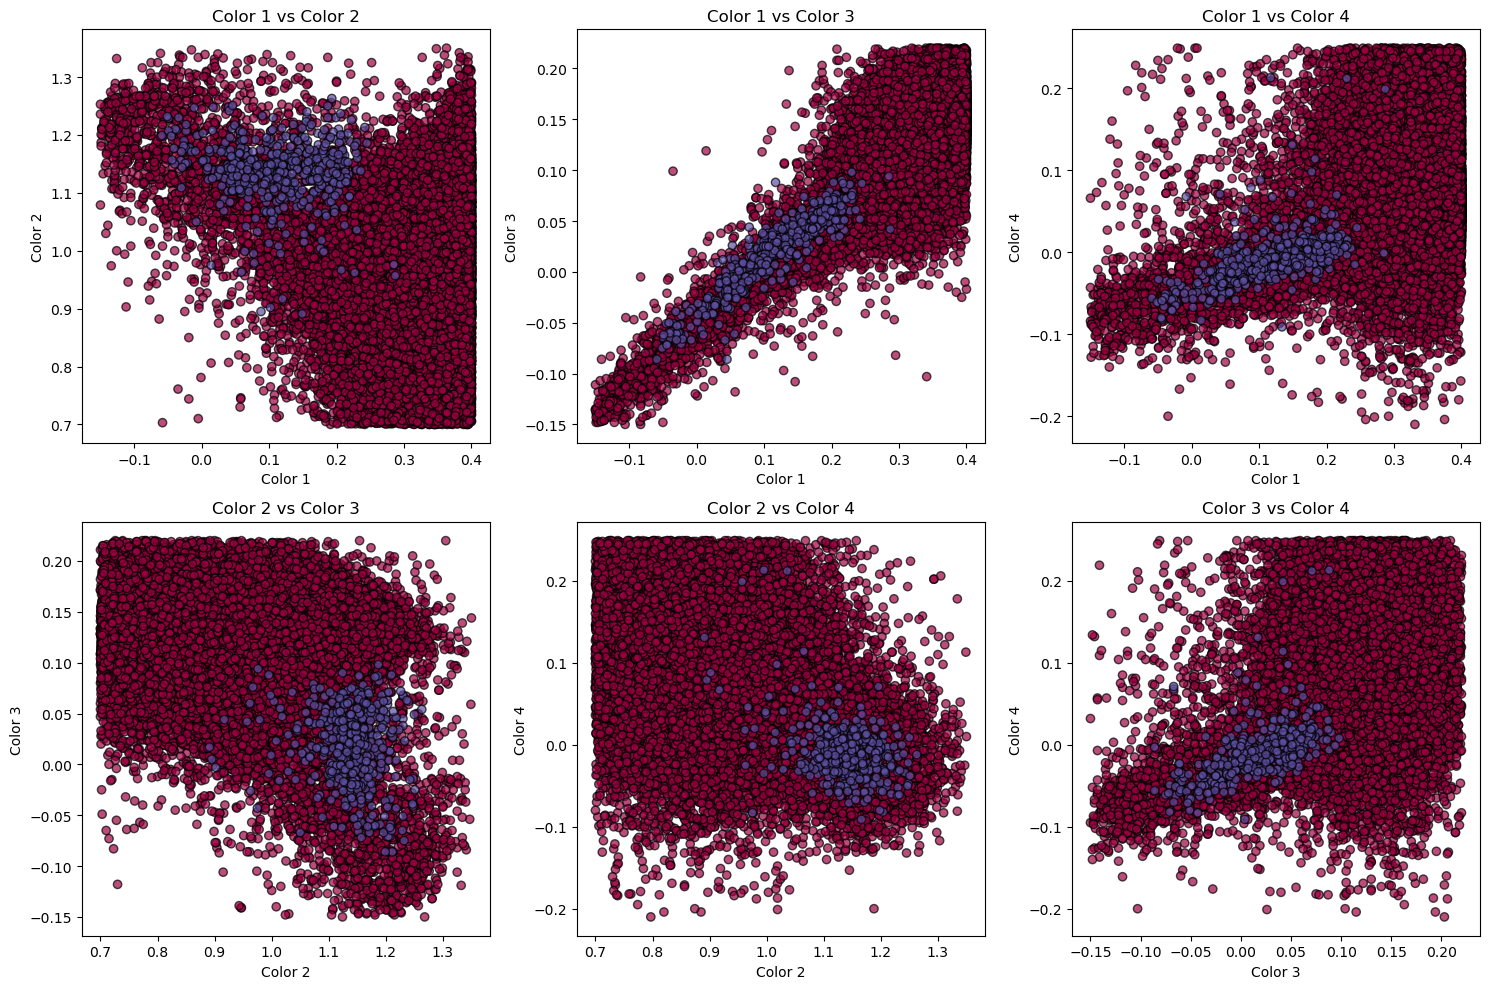

In [48]:
# Create six small plots for different combinations of colors
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plotting color 1 vs color 2
axs[0, 0].scatter(X[:, 0], X[:, 1], c=Y, cmap='Spectral', edgecolor='k', alpha=0.7)
axs[0, 0].set_xlabel('Color 1')
axs[0, 0].set_ylabel('Color 2')
axs[0, 0].set_title('Color 1 vs Color 2')

# Plotting color 1 vs color 3
axs[0, 1].scatter(X[:, 0], X[:, 2], c=Y, cmap='Spectral', edgecolor='k', alpha=0.7)
axs[0, 1].set_xlabel('Color 1')
axs[0, 1].set_ylabel('Color 3')
axs[0, 1].set_title('Color 1 vs Color 3')

# Plotting color 1 vs color 4
axs[0, 2].scatter(X[:, 0], X[:, 3], c=Y, cmap='Spectral', edgecolor='k', alpha=0.7)
axs[0, 2].set_xlabel('Color 1')
axs[0, 2].set_ylabel('Color 4')
axs[0, 2].set_title('Color 1 vs Color 4')

# Plotting color 2 vs color 3
axs[1, 0].scatter(X[:, 1], X[:, 2], c=Y, cmap='Spectral', edgecolor='k', alpha=0.7)
axs[1, 0].set_xlabel('Color 2')
axs[1, 0].set_ylabel('Color 3')
axs[1, 0].set_title('Color 2 vs Color 3')

# Plotting color 2 vs color 4
axs[1, 1].scatter(X[:, 1], X[:, 3], c=Y, cmap='Spectral', edgecolor='k', alpha=0.7)
axs[1, 1].set_xlabel('Color 2')
axs[1, 1].set_ylabel('Color 4')
axs[1, 1].set_title('Color 2 vs Color 4')

# Plotting color 3 vs color 4
axs[1, 2].scatter(X[:, 2], X[:, 3], c=Y, cmap='Spectral', edgecolor='k', alpha=0.7)
axs[1, 2].set_xlabel('Color 3')
axs[1, 2].set_ylabel('Color 4')
axs[1, 2].set_title('Color 3 vs Color 4')

plt.tight_layout()
plt.show()


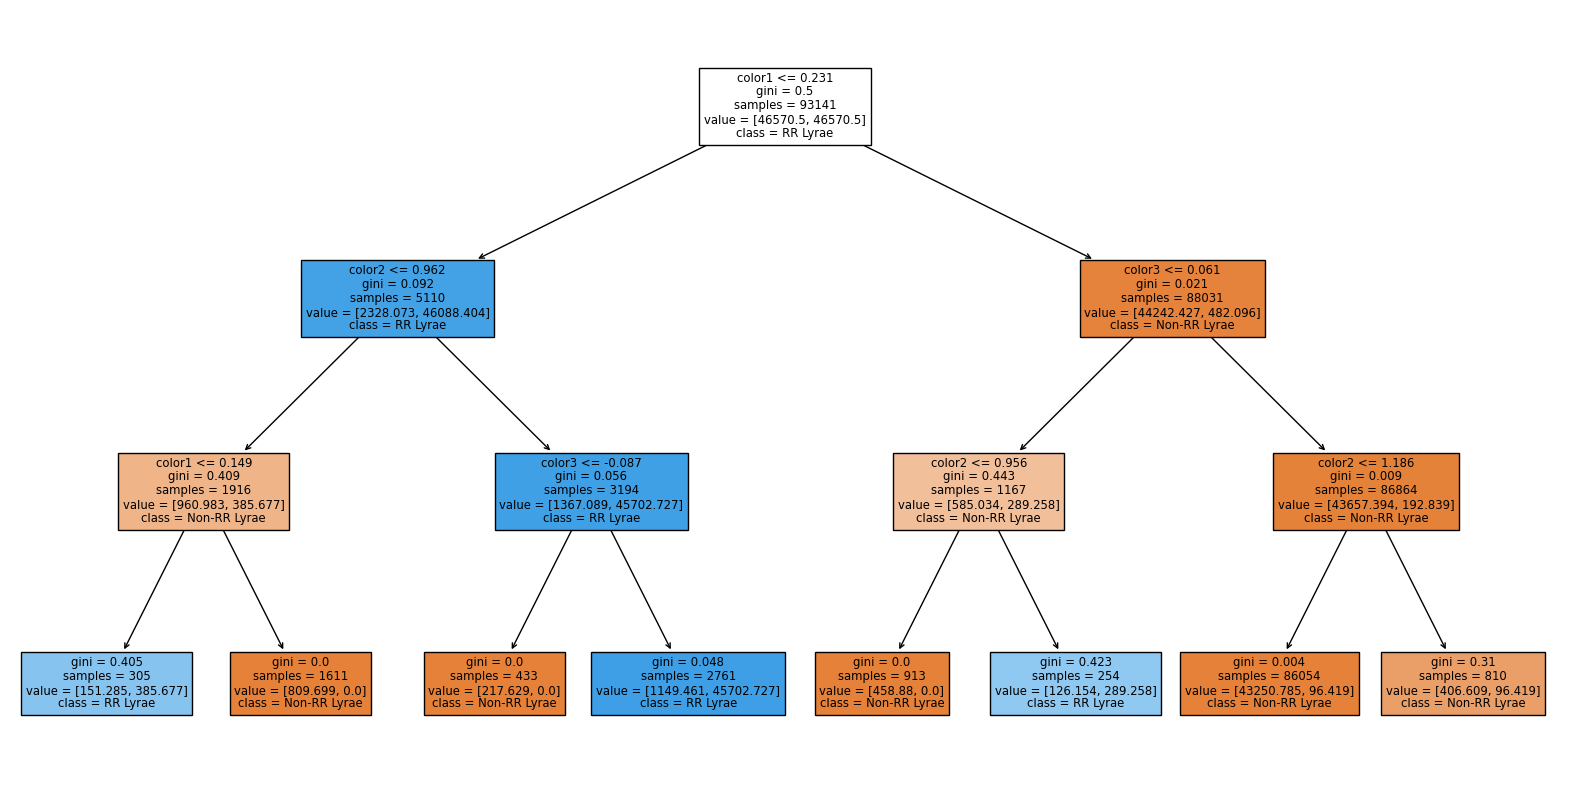

In [41]:
clf = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
clf.fit(X, Y)

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=['color1', 'color2', 'color3', 'color4'], class_names=['Non-RR Lyrae', 'RR Lyrae'])
plt.show()